# **Business Understanding**
The dataset I have been provided with, is based on LendingClub company. The company is a US based lending company that provides lending services of various types of loans to its customers. When someone applies for a loan, the company has to make a decision: whether to approve the loan or not based on the applicant's profile and finiancial history. Two types of risks are associated with the bank’s decision:


1.   If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
2.   If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

Our Target Variable is `loan_status`, having four values


*   Fully Paid (Applicant has fully paid the loan)
*   Charged Off (Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan)
*   Does not meet the credit policy. Status: Fully Paid
*   Does not meet the credit policy. Status: Charged Off












In [ ]:
#Mounting Google Drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing libraries 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/ML_Datasets/loan.csv',skiprows=1)
data

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,NaN,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7%,9.0,f,0.0,0.0,5863.155187,5833.84,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,NaN,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4%,4.0,f,0.0,0.0,1014.530000,1014.53,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,NaN,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5%,10.0,f,0.0,0.0,3005.666844,3005.67,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,NaN,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21%,37.0,f,0.0,0.0,12231.890000,12231.89,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Fully Paid,n,NaN,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9%,38.0,f,0.0,0.0,4066.908161,4066.91,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42533,NaN,NaN,2525.0,2525.0,225.0,36 months,9.33%,80.69,B,B3,NaN,< 1 year,RENT,110000.0,Not Verified,Jun-2007,Does not meet the credit pol

In [ ]:
##Finding the the count and percentage of values that are missing in the dataframe.
dfNull = pd.DataFrame({'Count': data.isnull().sum(), 'Percent': 100*data.isnull().sum()/len(data)})

##printing columns with null count more than 0
##dfNull[dfNull['Count'] > 0]

dfNull.sort_values(['Percent'], ascending=False, inplace=True)
dfNull
 

,Count,Percent
total_cu_tl,42538,100.000000
num_op_rev_tl,42538,100.000000
open_acc_6m,42538,100.000000
tot_cur_bal,42538,100.000000
tot_coll_amt,42538,100.000000
...,...,...
zip_code,3,0.007053
addr_state,3,0.007053
dti,3,0.007053
total_rec_int,3,0.007053


In [ ]:
#there are lots for null values in some columns, so following will remove all those columns having more than 50% null values
df1 = data.dropna(axis=1, thresh=int(0.50*len(data)))
df1

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag
0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,3.0,0.0,13648.0,83.7%,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.00,Jan-2015,171.62,Aug-2018,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N
1,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,3.0,0.0,1687.0,9.4%,4.0,f,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.00,122.9,1.11,Apr-2013,119.66,Oct-2016,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N
2,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,2.0,0.0,2956.0,98.5%,10.0,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.0,0.00,Jun-2014,649.91,Jun-2017,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N
3,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,10.0,0.0,5598.0,21%,37.0,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.0,0.00,Jan-2015,357.48,Apr-2016,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N
4,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Fully Paid,n,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,15.0,0.0,27783.0,53.9%,38.0,f,0.0,0.0,4066.908161,4066.91,3000.00,1066.91,0.00,0.0,0.00,Jan-2017,67.30,Apr-2018,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42533,2525.0,2525.0,225.0,36 months,9.33%,80.69,B,B3,NaN,< 1 year,RENT,110000.0,Not Verified,Jun-2007,Does not meet the credit policy. Status:Fully ...,n,"I need to pay $2,100 for fixing my Volvo :) A...",other,Car repair bill,100xx,NY,10.00,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,f,0.0,0.0,2904.498829,258.82,2525.00,379.50,0.00,0.0,0.00,Jun-2010,82.03,May-2007,NaN,1.0,Individual,NaN,NaN,NaN,NaN,NaN,N,Cash,N
42534,6500.0,6500.0,0.0,36 months,8.38%,204.84,A,A5,NaN,< 1 year,NONE,NaN,Not Verified,Jun-2007,Does not meet the credit policy. Status:Fully ...,n,"Hi, I'm buying a used car. Anybody on faceb...",other,Buying a car,100xx,NY,4.00,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,f,0.0,0.0,7373.904962,0.00,6500.00,873.90,0.00,0.0,0.00,Jun-2010,205.32,Aug-2007,NaN,1.0,Individual,NaN,NaN,NaN,NaN,NaN,N,Cash,N
42535,5000.0,5000.0,0.0,36 months,7.75%,156.11,A,A3,Homemaker,10+ years,MORTGAGE,70000.0,Not Verified,Jun-2007,Does not meet the credit policy. Status:Fully ...,n,I need to make several improvements around the...,other,Aroundthehouse,068xx,CT,8.81,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,f,0.0,0.0,5619.762090,0.00,5000.00,619.76,0.00,0.0,0.00,Jun-2010,156.39,Feb-2015,NaN,1.0,Individual,NaN,NaN,NaN,NaN,NaN,N,Cash,N
42536,Na

In [ ]:
#selection of necessary columns for our analysis
df = df1.filter(['loan_amnt','term','int_rate','installment','grade','sub_grade','emp_length','home_ownership',
                    'annual_inc','verification_status','purpose','addr_state','dti','loan_status'])
df.dtypes

loan_amnt              float64
term                    object
int_rate                object
installment            float64
grade                   object
sub_grade               object
emp_length              object
home_ownership          object
annual_inc             float64
verification_status     object
purpose                 object
addr_state              object
dti                    float64
loan_status             object
dtype: object

# **Univariate Analysis**

 **Catagorical Variables**

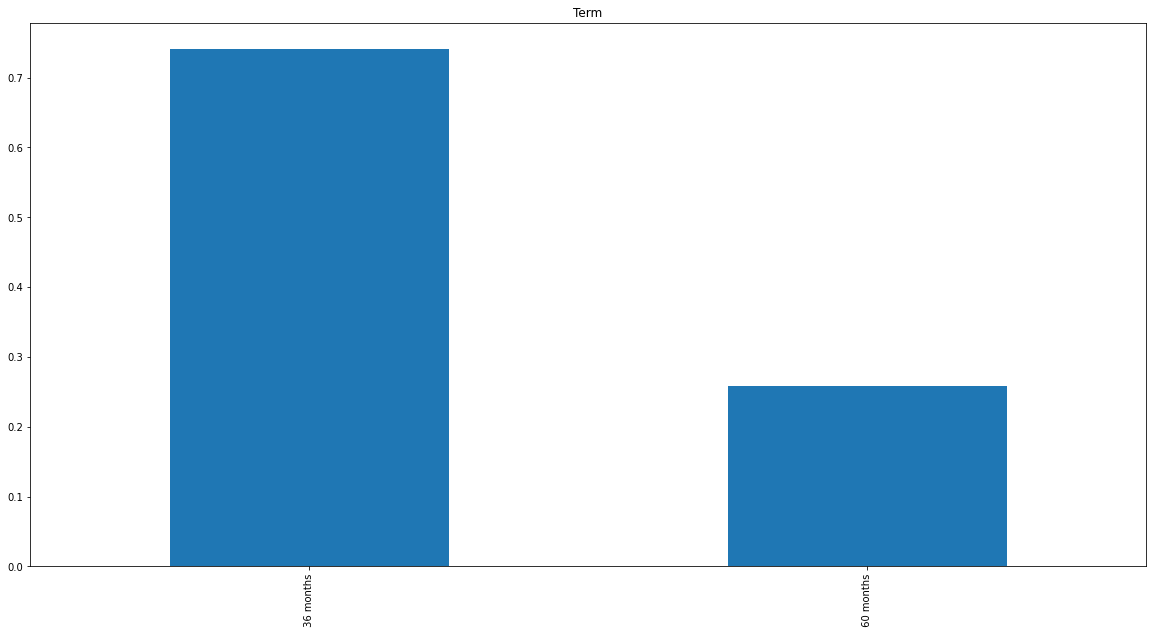

In [ ]:
df['term'].value_counts(normalize=True).plot.bar(figsize=
(20,10), title='Term')
plt.show()

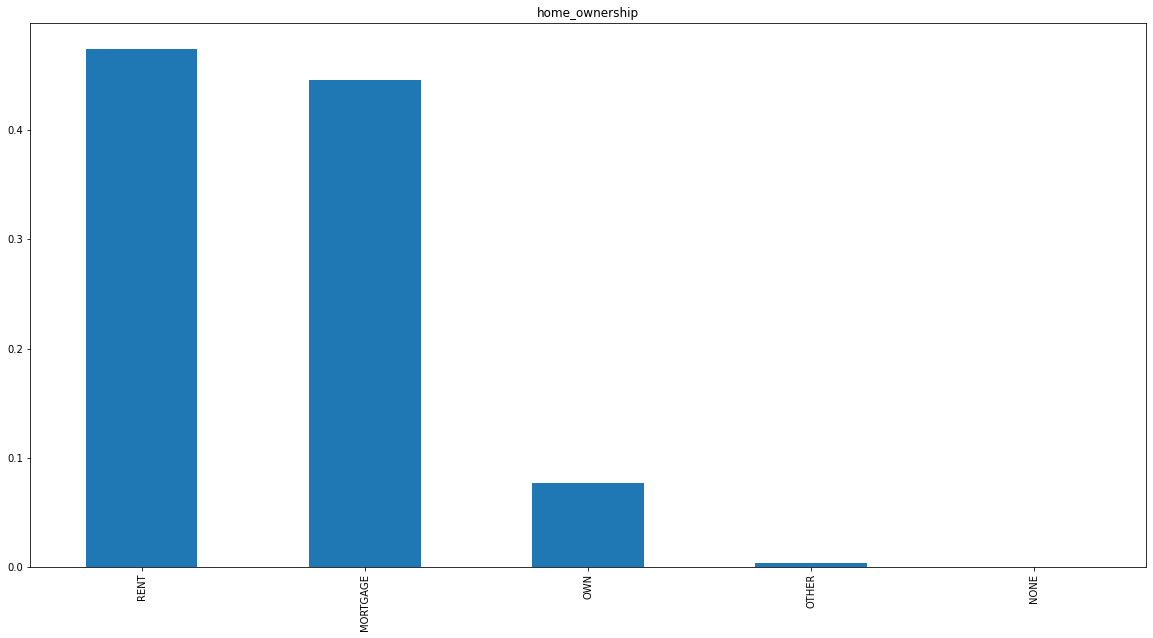

In [ ]:
df['home_ownership'].value_counts(normalize=True).plot.bar(figsize=
(20,10), title='home_ownership')
plt.show()

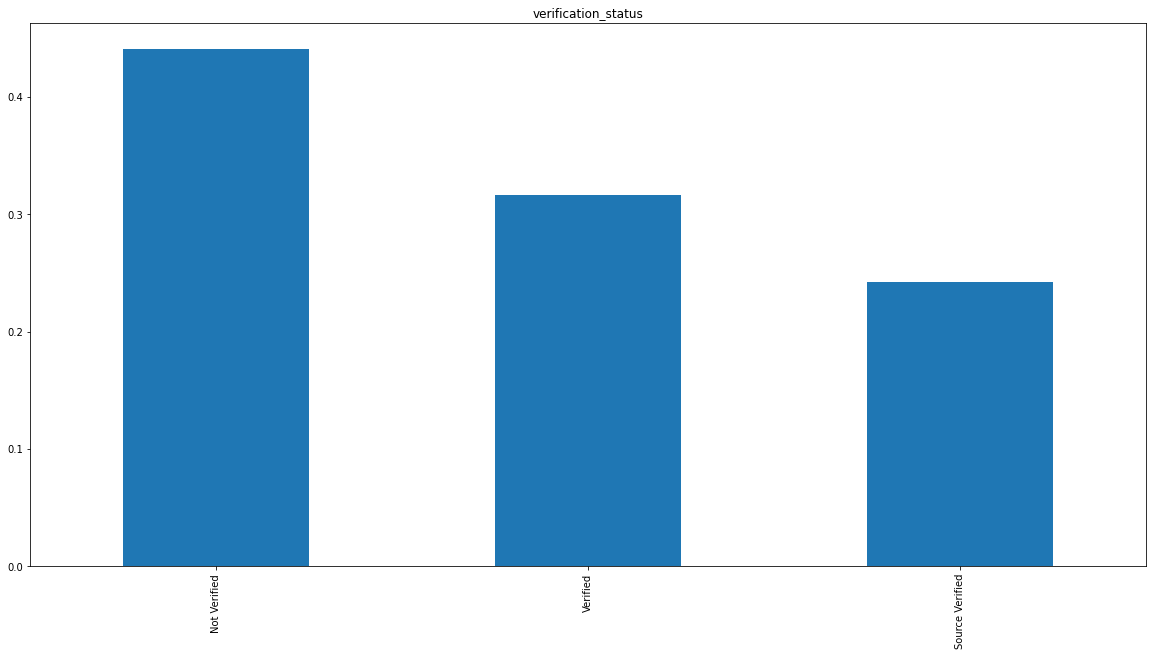

In [ ]:
df['verification_status'].value_counts(normalize=True).plot.bar(figsize=
(20,10), title='verification_status')
plt.show()

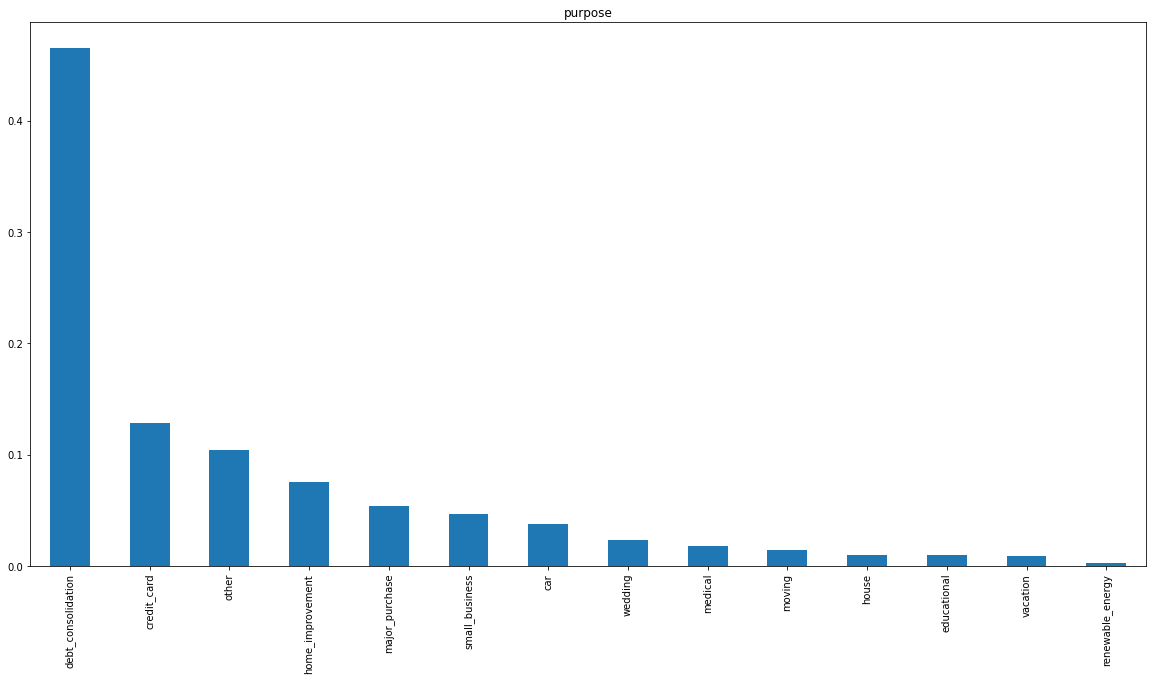

In [ ]:
df['purpose'].value_counts(normalize=True).plot.bar(figsize=
(20,10), title='purpose')
plt.show()

Ordinal Variables

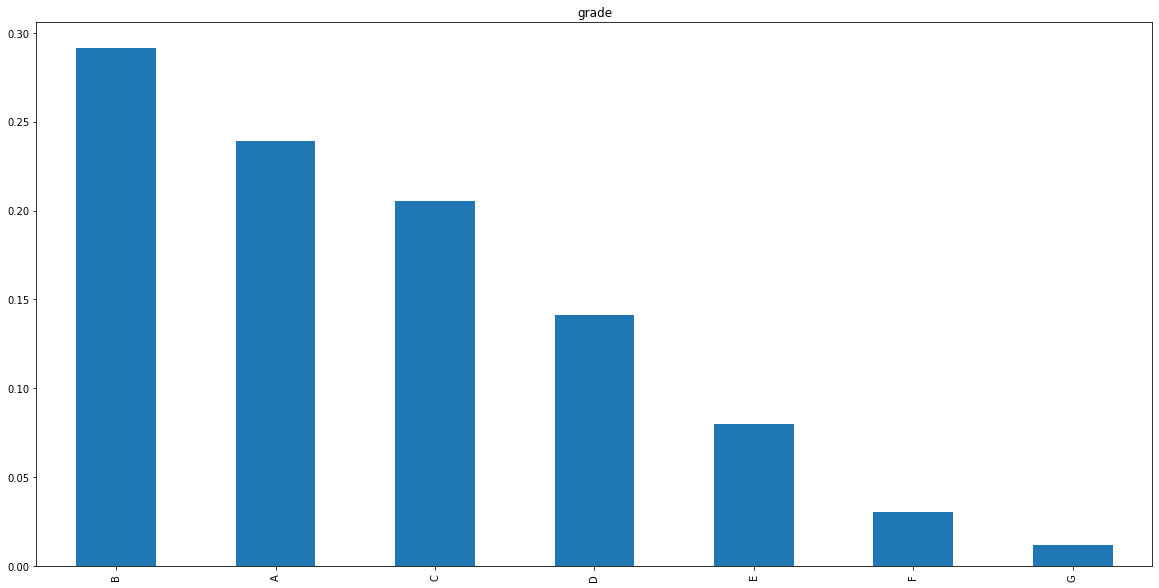

In [ ]:
df['grade'].value_counts(normalize=True).plot.bar(figsize=
(20,10), title='grade')
plt.show()


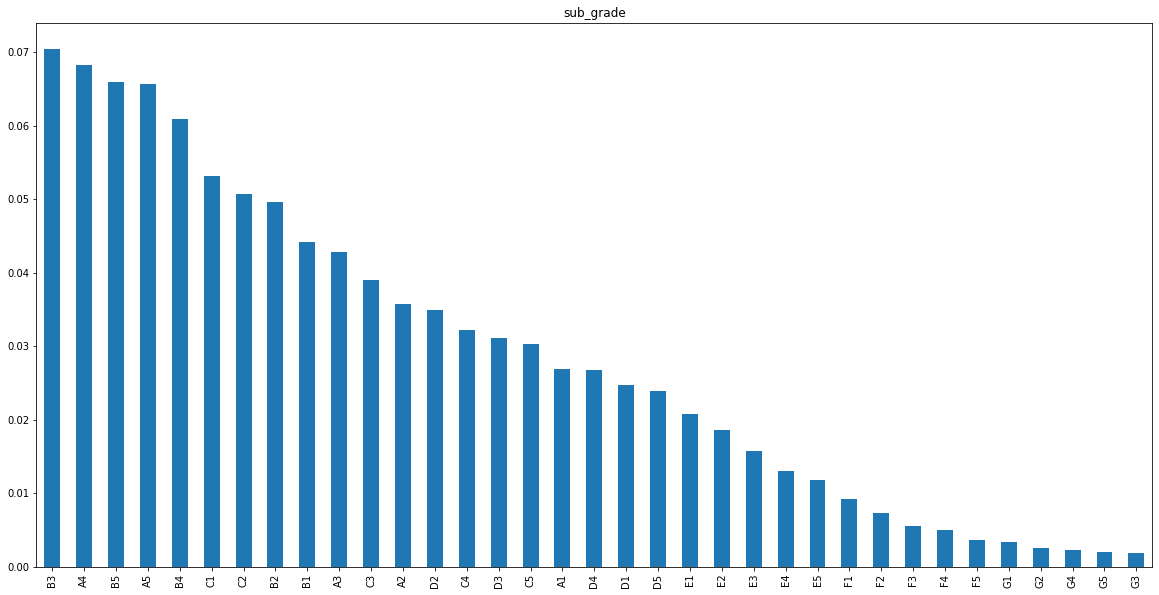

In [ ]:
df['sub_grade'].value_counts(normalize=True).plot.bar(figsize=
(20,10), title='sub_grade')
plt.show()

**Nominal Variables**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


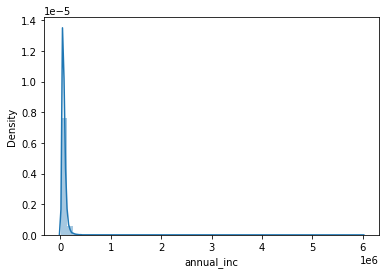

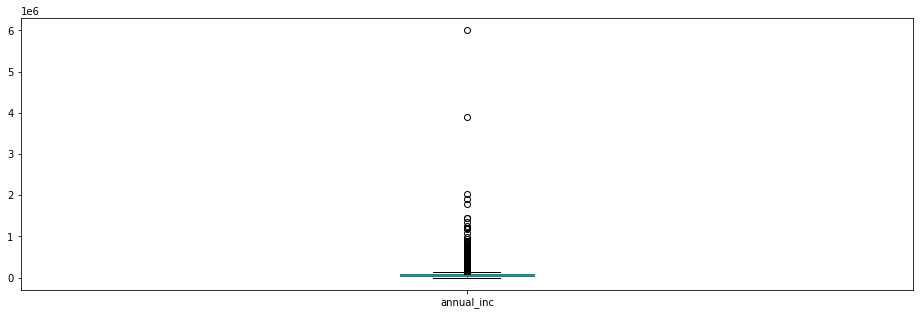

In [ ]:
sns.distplot(df['annual_inc'])
plt.show()
df['annual_inc'].plot.box(figsize=(16,5))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


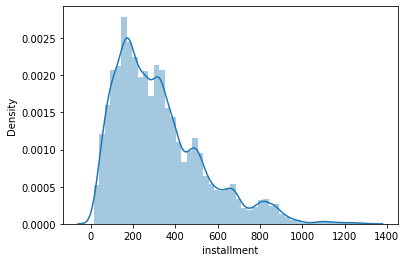

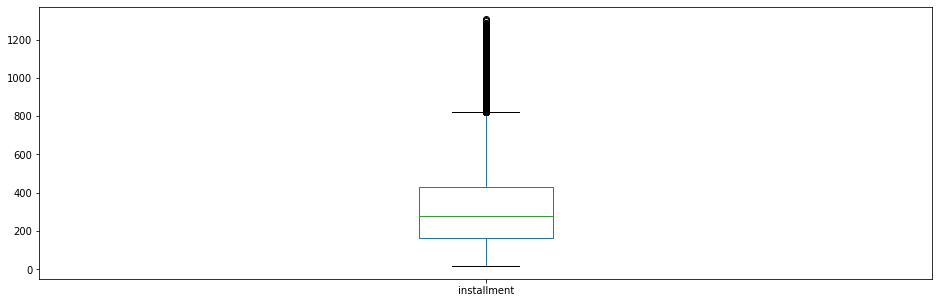

In [ ]:
sns.distplot(df['installment'])
plt.show()
df['installment'].plot.box(figsize=(16,5))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


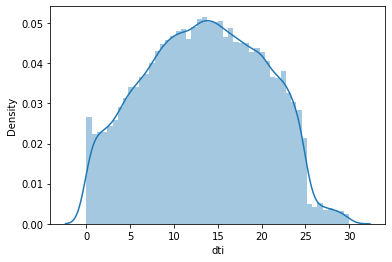

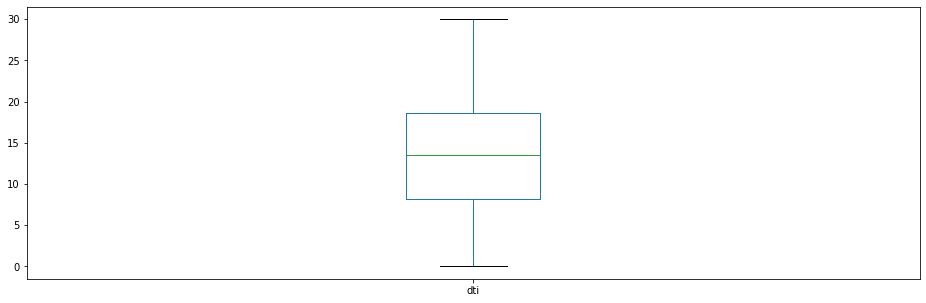

In [ ]:
sns.distplot(df['dti'])
plt.show()
df['dti'].plot.box(figsize=(16,5))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


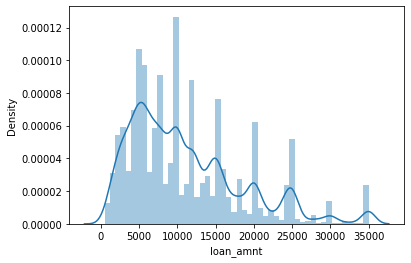

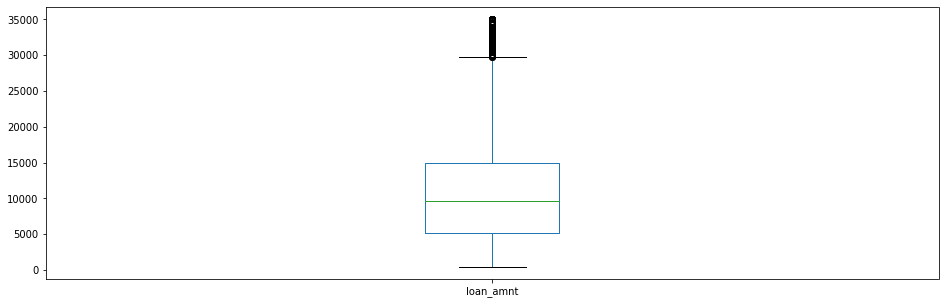

In [ ]:
df.notna()
sns.distplot(df['loan_amnt'])
plt.show()
df['loan_amnt'].plot.box(figsize=(16,5))
plt.show()


**Target Variable**

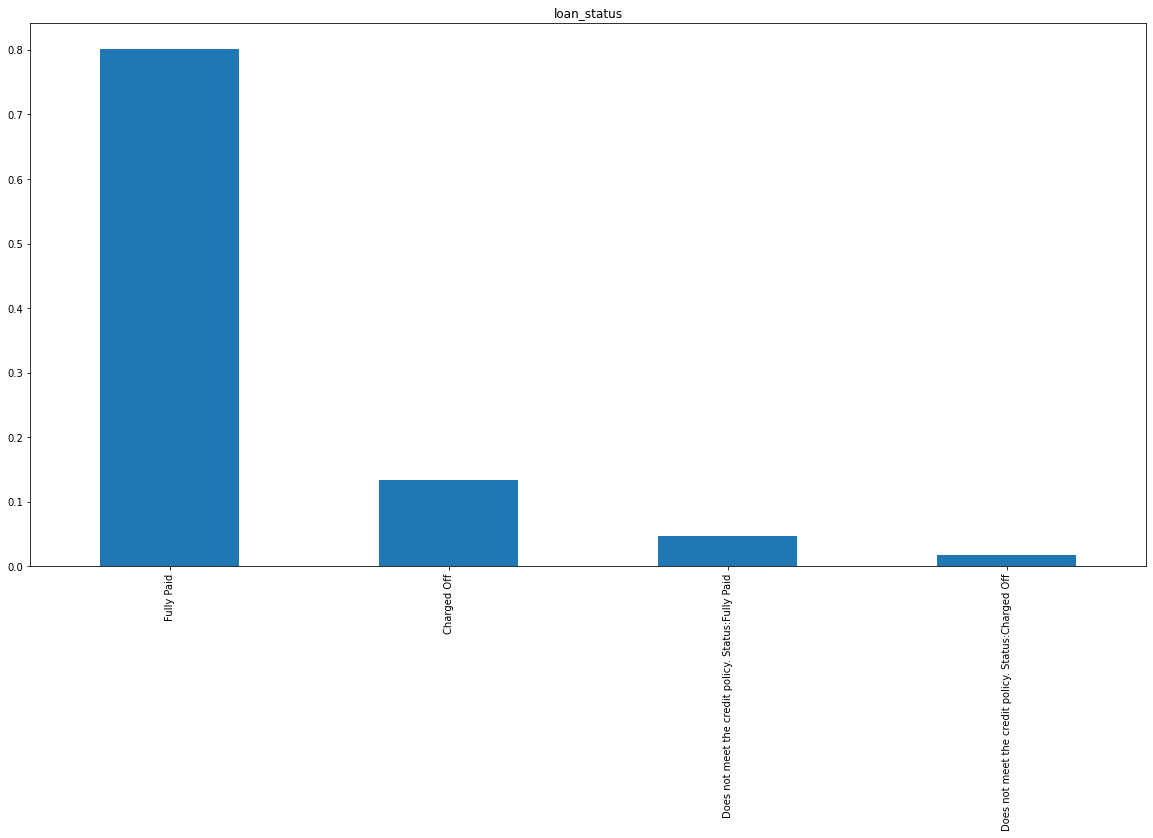

In [ ]:
df['loan_status'].value_counts(normalize=True).plot.bar(figsize=
(20,10), title='loan_status')
plt.show()

As we can see in the above figue, large amount of records fall in `Fully Paid` class and very few in the rest of classes. That mean our data is very imbalanced. We have to combine some classes for our analysis later.

## **Categorical Independent Variable vs Target Variable**

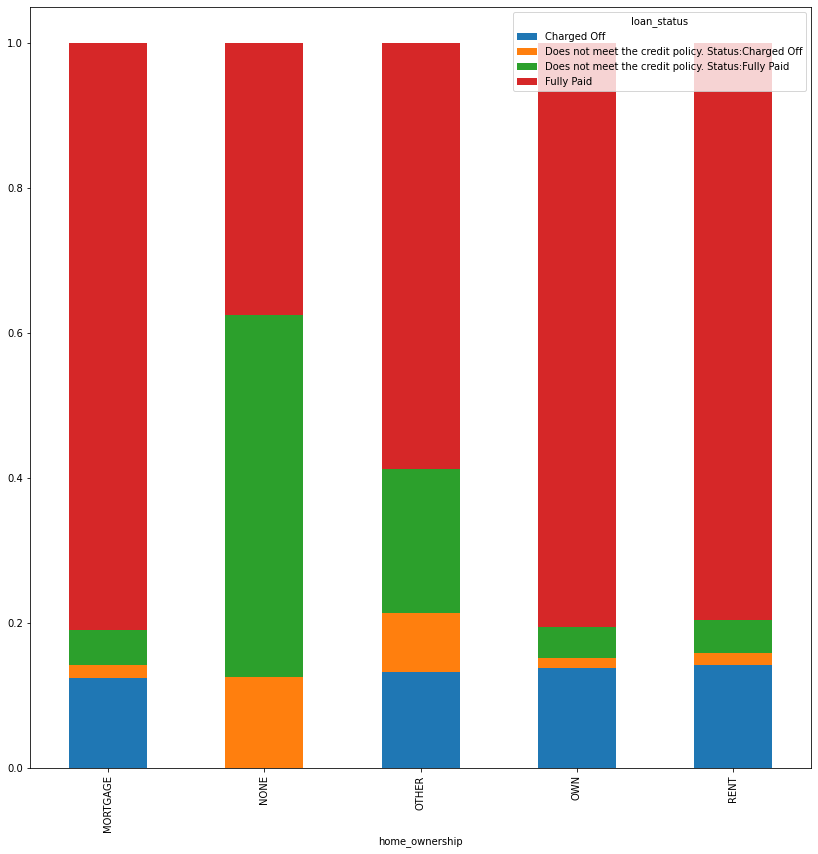

In [ ]:
homeOwner=pd.crosstab(df['home_ownership'],df['loan_status'])
homeOwner.div(homeOwner.sum(1).astype(float),
axis=0).plot(kind="bar",stacked=True,figsize=(14,14))
plt.show()

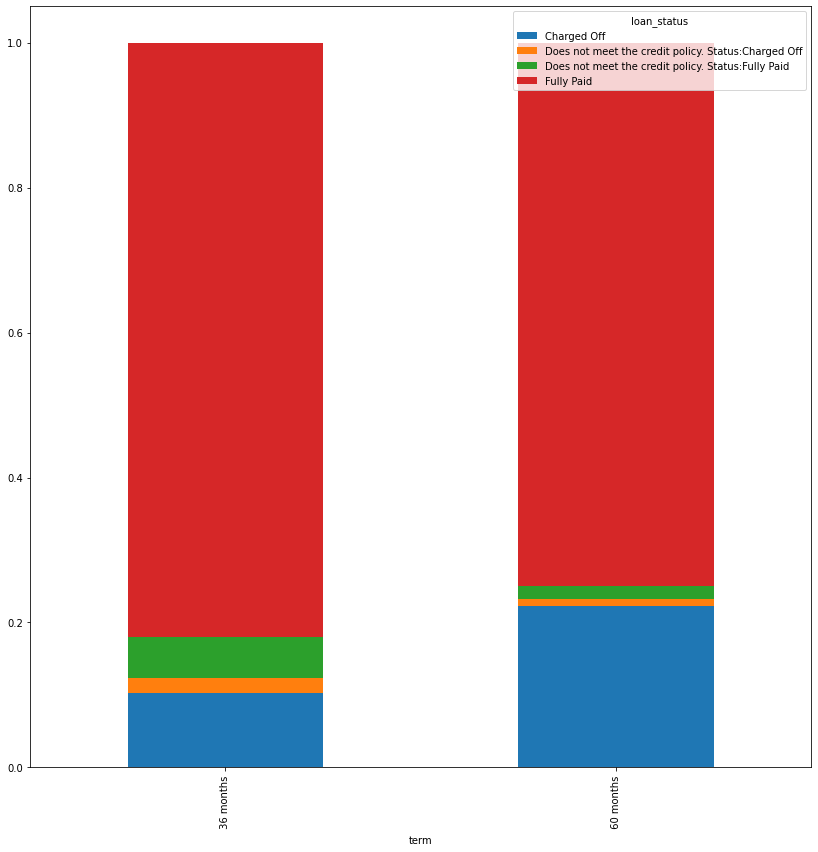

In [ ]:
term=pd.crosstab(df['term'],df['loan_status'])
term.div(term.sum(1).astype(float),
axis=0).plot(kind="bar",stacked=True,figsize=(14,14))
plt.show()

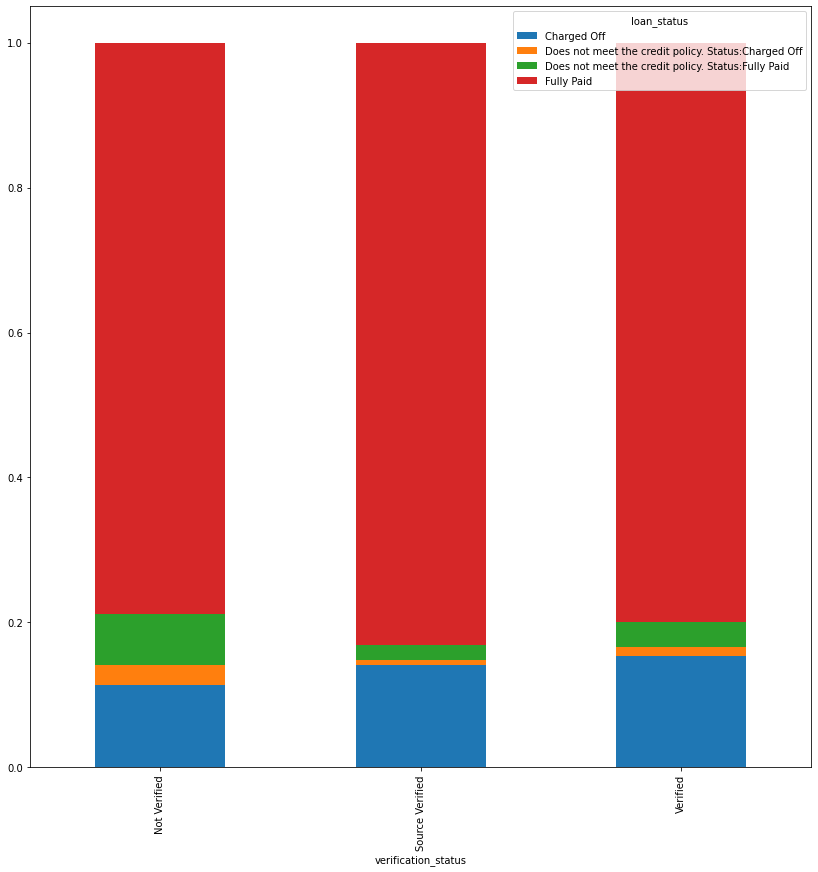

In [ ]:
varStatus=pd.crosstab(df['verification_status'],df['loan_status'])
varStatus.div(varStatus.sum(1).astype(float),
axis=0).plot(kind="bar",stacked=True,figsize=(14,14))
plt.show()

# **Finding the correlation between variables**
We will now look at the correlation structure between our variables that we selected above. This will tell us about any dependencies between different variables and help us reduce the dimensionality a little bit more.

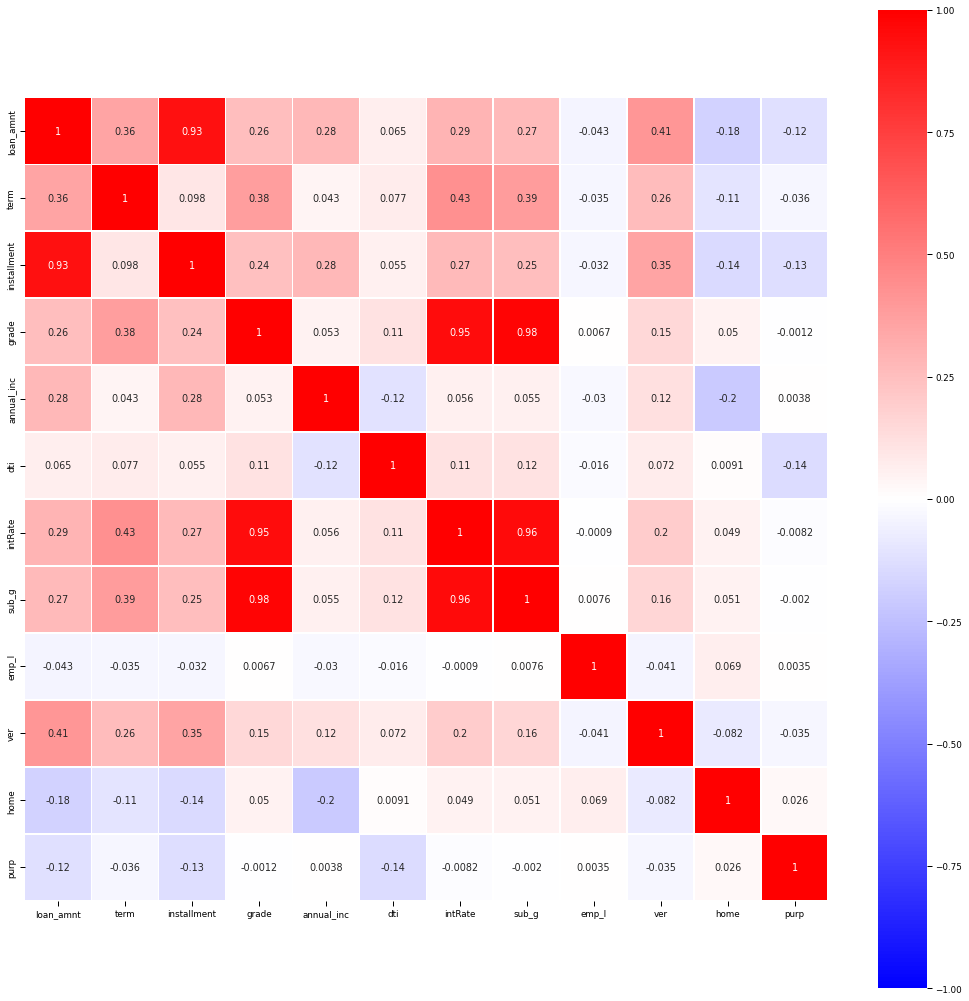

In [ ]:
plt.figure(figsize=(18,18))
sns.set_context("paper", font_scale=1)
##finding the correllation matrix and changing the categorical data to category for the plot.
sns.heatmap(df.assign(grade=df.grade.astype('category').cat.codes,
                      intRate=df.int_rate.astype('category').cat.codes,
                         sub_g=df.sub_grade.astype('category').cat.codes,
                         term=df.term.astype('category').cat.codes,
                        emp_l=df.emp_length.astype('category').cat.codes,
                         ver =df.verification_status.astype('category').cat.codes,
                        home=df.home_ownership.astype('category').cat.codes,
                        purp=df.purpose.astype('category').cat.codes).corr(), 
                         annot=True, cmap='bwr',vmin=-1, vmax=1, square=True, linewidths=0.5)